### Import Libraries

In [30]:
# Pandas for dataframes
import pandas as pd

# Import Team Class
from Classes.team import Team

# Pickle import for data serialization and deserialization
import pickle

# Import CSV for read/write of data files
import csv

# For use of nan
import math

# numpy for arrays
import numpy as np

# Data Visualization
import seaborn as sns

import numpy as np

from mord import LogisticAT

### Define Constants

In [61]:
# Drop Columns -- Determined by EDA
to_drop = ['g_rank', 'opp_g_rank', 'opp_mp_per_g_rank', 'mp_per_g_rank', 'Test Year', 'Team Name', 'Team ID', 'g', 'opp_g', 'mp_per_g', 'opp_mp_per_g']

### Define Functions

In [32]:
def feature_importance(model, feature_names):
    count = 0
    importance_dict = {}
    for stat in model.feature_names_in_:
        importance_dict[feature_names[int(stat)]] = model.feature_importances_[count]
        count +=1

    importance_df = pd.DataFrame.from_dict([importance_dict])

    return importance_df

In [33]:
def feature_coeff(model, feature_names):
    count = 0
    coeff_dict = {}
    for stat in model.feature_names_in_:
        coeff_dict[feature_names[int(stat)]] = model.coef_[count]
        count +=1

    coeff_df = pd.DataFrame.from_dict([coeff_dict])

    return coeff_df

In [34]:
def logreg_coeff(model, feature_names):
    count = 0
    coeff_dict = {}

    for name in feature_names:
        coeff_dict[name] = model.coef_[count]
        count += 1

    coeff_df = pd.DataFrame.from_dict([coeff_dict])

    return coeff_df

In [35]:
def import_df(filename, to_drop):
    target_df = pd.read_csv(filename)

    # Drop Columns -- Determined by EDA
    target_df.drop(columns = to_drop, inplace=True)

    # Convert 'Madness Result' to Integer
    target_df['Madness Result'] = target_df['Madness Result'].astype(dtype= int)

    return target_df

### Import Data - Yearly or All Years

In [66]:
filename = 'Data/Madness/all_years.csv'
# target_year = '2012-13'
# filename = f'Data/Madness/{target_year}.csv'

target_df = import_df(filename=filename, to_drop=to_drop)

# Gather Column Names for future reference
column_names = target_df.drop(columns=['Madness Result']).columns

In [67]:
target_year = '2012-13'
filename = f'Data/Madness/{target_year}.csv'

test_df = import_df(filename=filename, to_drop=to_drop)

In [64]:
team_names

0              Louisville Cardinals
1               Michigan Wolverines
2                   Syracuse Orange
3            Wichita State Shockers
4                  Duke Blue Devils
                  ...              
63                Wisconsin Badgers
64              Boise State Broncos
65                   Liberty Flames
66    Long Island University Sharks
67    Middle Tennessee Blue Raiders
Name: Team Name, Length: 68, dtype: object

In [68]:
test_data = test_df.drop(columns=['Madness Result'])

In [69]:
test_data

,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,...,opp_ft_pct_rank,opp_orb_per_g_rank,opp_drb_per_g_rank,opp_trb_per_g_rank,opp_ast_per_g_rank,opp_stl_per_g_rank,opp_blk_per_g_rank,opp_tov_per_g_rank,opp_pf_per_g_rank,opp_pts_per_g_rank
0,26.2,57.5,0.456,20.5,40.2,0.508,5.8,17.3,0.333,16.3,...,21,264,51,111,292,48,157,346,294,21
1,28.0,57.9,0.484,20.4,38.2,0.535,7.6,19.7,0.385,11.5,...,108,99,78,67,286,30,134,75,18,86
2,25.2,57.3,0.439,19.4,39.9,0.485,5.8,17.4,0.335,14.2,...,67,321,89,212,259,234,136,301,212,20
3,24.5,55.5,0.440,17.8,35.9,0.496,6.6,19.6,0.339,14.2,...,286,30,49,25,230,54,88,138,200,46
4,26.7,56.5,0.472,19.2,37.7,0.508,7.5,18.8,0.399,16.3,...,317,244,164,200,277,10,101,220,310,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,23.5,56.0,0.420,16.1,33.6,0.480,7.4,22.4,0.330,10.5,...,147,42,210,116,216,55,17,32,131,7
64,25.8,55.9,0.460,18.0,36.0,0.499,7.8,19.9,0.391,13.9,...,247,1,81,11,215,67,73,181,147,141
65,23.3,54.3,0.429,16.3,35.7,0.457,7.0,18.6,0.375,15.6,...,121,286,225,278,144,188,224,19,257,260
66,26.9,56.1,0.479,19.7,37.1,0.530,7.2,19.0,0.380,17.7,...,82,270,73,149,318,223,240,140,346,333


## Feature Engineering

In [37]:
# Split in train and validation

from sklearn.model_selection import train_test_split

y = target_df['Madness Result']
X = target_df.drop(columns=['Madness Result'])

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

### Pipeline Configuration

In [22]:
# Deal with outliers

from feature_engine.outliers import Winsorizer

capper = Winsorizer(capping_method="iqr", tail="both")
capper.fit(X_train)

X_train = capper.transform(X_train)
X_val = capper.transform(X_val)

In [23]:
# Variance Stabilizing Transformations

from feature_engine.transformation import YeoJohnsonTransformer

yeo_trans = YeoJohnsonTransformer()
yeo_trans.fit(X_train)

X_train = yeo_trans.transform(X_train)
X_val = yeo_trans.transform(X_val)

In [24]:
# Scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [25]:
from feature_engine.selection import DropConstantFeatures

# Drop constant
drop_const = DropConstantFeatures()
drop_const.fit(X_train)

X_train = drop_const.transform(X_train)
X_val = drop_const.transform(X_val)

# Drops 0 features

In [26]:
from feature_engine.selection import DropDuplicateFeatures

# Drop duplicates
drop_dup = DropDuplicateFeatures()
drop_dup.fit(X_train)

X_train = drop_dup.transform(X_train)
X_val = drop_dup.transform(X_val)

# Drops 0 features

In [27]:
# Drop correlated
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from feature_engine.selection import SmartCorrelatedSelection

drop_corr = SmartCorrelatedSelection(method='spearman',
                                     selection_method='model_performance',
                                     estimator=RandomForestRegressor())

drop_corr.fit(X_train, y_train)

X_train = drop_corr.transform(X_train)
X_val = drop_corr.transform(X_val)

/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition fo

In [28]:
drop_corr.features_to_drop_

['0',
 '1',
 '2',
 '3',
 '5',
 '6',
 '7',
 '9',
 '10',
 '12',
 '14',
 '16',
 '17',
 '19',
 '20',
 '23',
 '24',
 '25',
 '29',
 '30',
 '32',
 '36',
 '39',
 '40',
 '43',
 '44',
 '45',
 '49',
 '52',
 '53',
 '54',
 '55',
 '59',
 '60',
 '61',
 '62',
 '63',
 '65',
 '66',
 '67',
 '68',
 '69',
 '71',
 '72',
 '73',
 '76',
 '78',
 '79',
 '81',
 '83']

## Pipeline

In [69]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(capper,
                     yeo_trans,
                     scaler,
                     drop_const,
                     drop_dup,
                     drop_corr)

pipe.fit(X_train, y_train)
X_train = pipe.transform(X_train)
X_val = pipe.transform(X_val)

# create a binary pickle file for main dataframe export 
f = open(f"Data/pipeline.pkl","wb")

pickle.dump(pipe, f)

/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition fo

In [31]:
column_names_trimmed = []

for col in X_train.columns:
    index = int(col)
    column_names_trimmed.append(column_names[index])

print(column_names_trimmed)

['fg2a_per_g', 'fg3_pct', 'ft_pct', 'drb_per_g', 'ast_per_g', 'tov_per_g', 'fg_per_g_rank', 'fga_per_g_rank', 'fg2_pct_rank', 'fg3_per_g_rank', 'fg3a_per_g_rank', 'fta_per_g_rank', 'orb_per_g_rank', 'drb_per_g_rank', 'trb_per_g_rank', 'stl_per_g_rank', 'blk_per_g_rank', 'pts_per_g_rank', 'opp_fg_per_g', 'opp_fg2a_per_g', 'opp_fg2_pct', 'opp_fg3_per_g', 'opp_fg3_pct', 'opp_ft_per_g', 'opp_trb_per_g', 'opp_ast_per_g', 'opp_stl_per_g', 'opp_fga_per_g_rank', 'opp_fg3a_per_g_rank', 'opp_ft_pct_rank', 'opp_orb_per_g_rank', 'opp_trb_per_g_rank', 'opp_blk_per_g_rank', 'opp_pf_per_g_rank']


## Modeling

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

### Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(max_depth=8, max_features=8, random_state=420)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

#importance_df = feature_importance(rfreg, column_names)
# Feature Importance
#print("Feature Importance: \n")
#importance_df

# w/ Feature Engineering & Selection
# Mean squared error: 1.84
# Coefficient of determination: 0.14

# w/o Feature Engineering & Selection
# Mean squared error: 1.81
# Coefficient of determination: 0.16

Mean squared error: 1.81
Coefficient of determination: 0.16


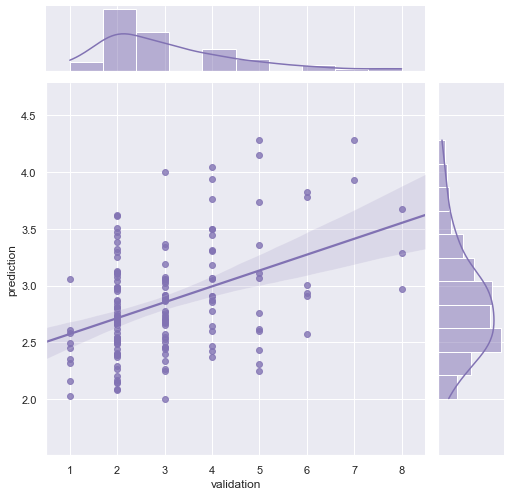

In [11]:
import seaborn as sns
sns.set_theme(style="darkgrid")

rf_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
rf_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

# The coefficients
# coeff_df = feature_coeff(regr, column_names)
# print("Coefficients: \n")
# coeff_df

# w/ Feature Engineering & Selection
# Mean squared error: 1.75
# Coefficient of determination: 0.18

# w/o Feature Engineering & Selection
# Mean squared error: 1.92
# Coefficient of determination: 0.10

Mean squared error: 1.92
Coefficient of determination: 0.10


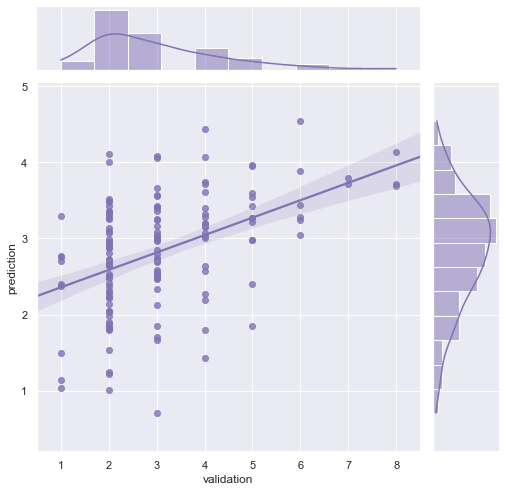

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

linreg_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
linreg_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### Logistic Regression

In [13]:
# Logistic Regression Model
logreg = LogisticAT()

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = logreg.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
# The coefficients

# The coefficients
# logreg_coeff(logreg, column_names_trimmed)

# w/ Feature Engineering & Selection
# Mean squared error: 1.85
# Coefficient of determination: 0.14

# w/o Feature Engineering & Selection
# Mean squared error: 2.06
# Coefficient of determination: 0.04

Mean squared error: 2.06
Coefficient of determination: 0.04


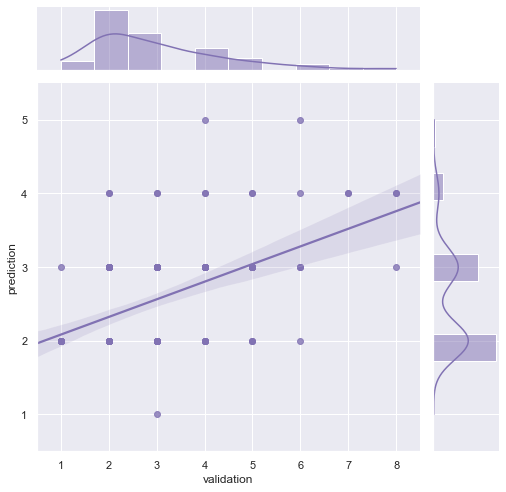

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

logreg_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
logreg_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### SVR

In [14]:
from sklearn.svm import SVR
svr_regressor = SVR(C=1,epsilon=0.2)
svr_regressor.fit(X_train, y_train)
y_pred = rfreg.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

# w/ Feature Engineering & Selection
# Mean squared error: 1.81
# Coefficient of determination: 0.14

# w/o Feature Engineering & Selection
# Mean squared error: 1.81
# Coefficient of determination: 0.16

Mean squared error: 1.81
Coefficient of determination: 0.16


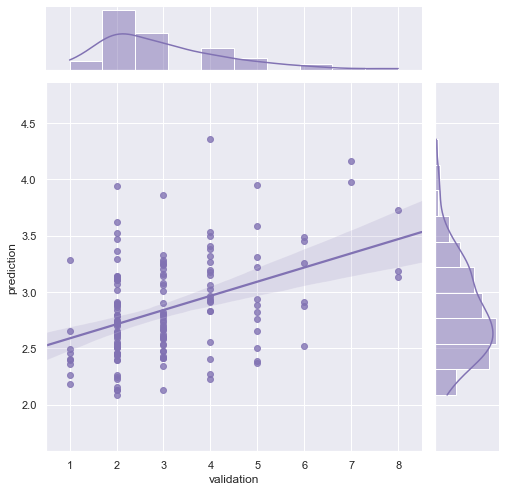

In [ ]:
svr_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
svr_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### Bagging Regressor - SVR

In [15]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

clf = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=5, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

# w/ Feature Engineering & Selection
# Mean squared error: 1.87
# Coefficient of determination: 0.13

# w/o Feature Engineering & Selection
# Mean squared error: 1.83
# Coefficient of determination: 0.15

Mean squared error: 1.83
Coefficient of determination: 0.15


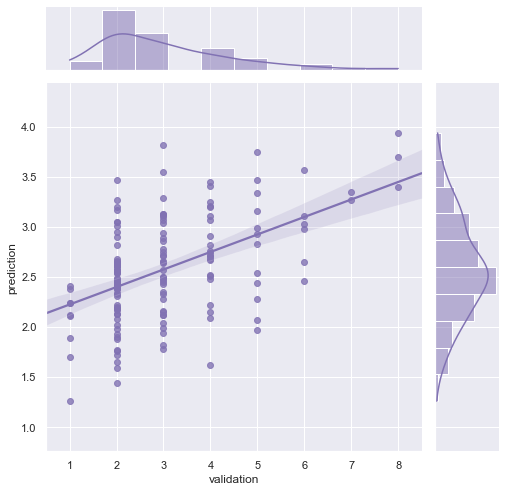

In [ ]:
bagging_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
bagging_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### Bagging Regressor - Random Forest

In [16]:
from sklearn.ensemble import BaggingRegressor

clf = BaggingRegressor(base_estimator=rfreg,
                        n_estimators=7, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

# w/ Feature Engineering & Selection
# Mean squared error: 1.87
# Coefficient of determination: 0.13

# w/o Feature Engineering & Selection
# Mean squared error: 1.78
# Coefficient of determination: 0.17

Mean squared error: 1.78
Coefficient of determination: 0.17


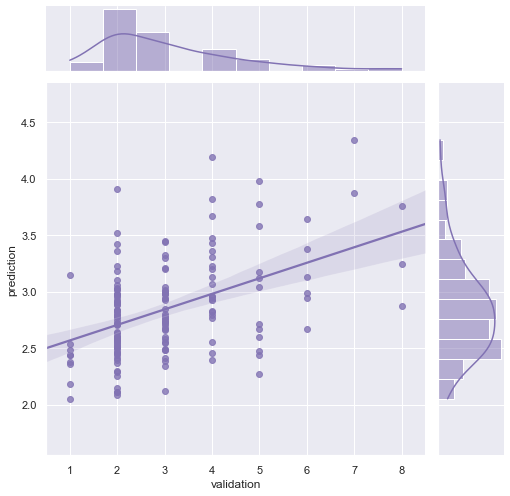

In [17]:
bagging_rf_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
bagging_rf_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=0, max_depth=5)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

# w/ Feature Engineering & Selection
# Mean squared error: 1.82
# Coefficient of determination: 0.15

# w/o Feature Engineering & Selection
# Mean squared error: 1.93
# Coefficient of determination: 0.10

Mean squared error: 1.93
Coefficient of determination: 0.10


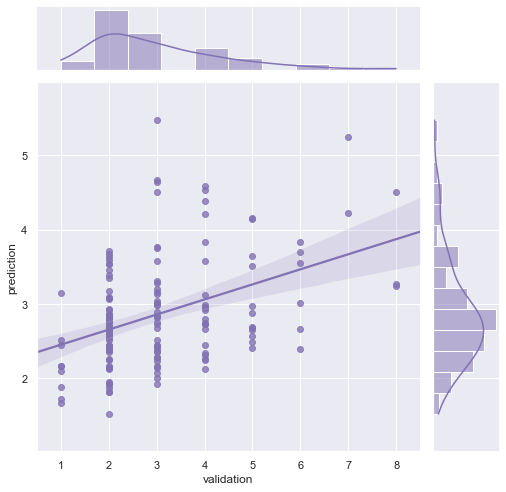

In [ ]:
gb_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
gb_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### AdaBoost Regressor

In [19]:
from sklearn.ensemble import AdaBoostRegressor

ada_regr = AdaBoostRegressor(random_state=420, n_estimators=100)
ada_regr.fit(X_train, y_train)
y_pred = ada_regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
#print("Score: %.2f" % ada_regr.score(X_val, y_val))

# w/ Feature Engineering & Selection
# Mean squared error: 1.74
# Coefficient of determination: 0.19

# w/o Feature Engineering & Selection
# Mean squared error: 1.77
# Coefficient of determination: 0.17

Mean squared error: 1.77
Coefficient of determination: 0.17


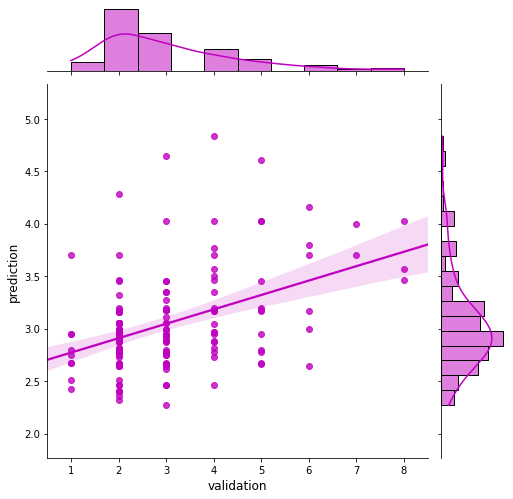

In [ ]:
ada_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
ada_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

### Voting Regressor

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
r1 = regr
r2 = rfreg
r3 = ada_regr

er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
y_pred = er.fit(X_train, y_train).predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
#print("Score: %.2f" % ada_regr.score(X_val, y_val))

# w/o Feature Engineering & Selection
#Mean squared error: 1.68
#Coefficient of determination: 0.22

# w/ Feature Engineering & Selection
# Mean squared error: 1.68
# Coefficient of determination: 0.22

Mean squared error: 1.68
Coefficient of determination: 0.22


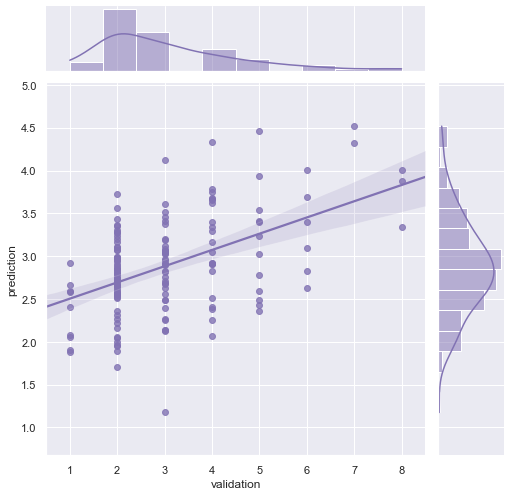

In [22]:
voting_joint_plot = sns.jointplot(x=y_val, y=y_pred,
                  kind="reg", truncate=False,
                  xlim=(y_val.min()-0.5, y_val.max()+0.5), ylim=(y_pred.min()-0.5, y_pred.max()+0.5),
                  color="m", height=7)
voting_joint_plot.set_axis_labels('validation', 'prediction', fontsize=12)

In [44]:
test_df

,Madness Result,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,...,opp_ft_pct_rank,opp_orb_per_g_rank,opp_drb_per_g_rank,opp_trb_per_g_rank,opp_ast_per_g_rank,opp_stl_per_g_rank,opp_blk_per_g_rank,opp_tov_per_g_rank,opp_pf_per_g_rank,opp_pts_per_g_rank
0,8,26.2,57.5,0.456,20.5,40.2,0.508,5.8,17.3,0.333,...,21,264,51,111,292,48,157,346,294,21
1,7,28.0,57.9,0.484,20.4,38.2,0.535,7.6,19.7,0.385,...,108,99,78,67,286,30,134,75,18,86
2,6,25.2,57.3,0.439,19.4,39.9,0.485,5.8,17.4,0.335,...,67,321,89,212,259,234,136,301,212,20
3,6,24.5,55.5,0.440,17.8,35.9,0.496,6.6,19.6,0.339,...,286,30,49,25,230,54,88,138,200,46
4,5,26.7,56.5,0.472,19.2,37.7,0.508,7.5,18.8,0.399,...,317,244,164,200,277,10,101,220,310,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2,23.5,56.0,0.420,16.1,33.6,0.480,7.4,22.4,0.330,...,147,42,210,116,216,55,17,32,131,7
64,1,25.8,55.9,0.460,18.0,36.0,0.499,7.8,19.9,0.391,...,247,1,81,11,215,67,73,181,147,141
65,1,23.3,54.3,0.429,16.3,35.7,0.457,7.0,18.6,0.375,...,121,286,225,278,144,188,224,19,257,260
66,1,26.9,56.1,0.479,19.7,37.1,0.530,7.2,19.0,0.380,...,82,270,73,149,318,223,240,140,346,333


In [70]:
result_pred = er.fit(X_train, y_train).predict(test_data)
result_pred

array([5.3048332 , 5.31562115, 3.69033679, 3.7277914 , 3.642918  ,
       4.20404573, 2.77633456, 3.46260934, 3.0155555 , 2.40782392,
       3.74556524, 3.34208426, 3.07594116, 3.40276307, 3.06708635,
       2.51461706, 2.56286869, 2.64621541, 2.96504041, 3.42513449,
       3.7840042 , 2.67870862, 2.65128514, 2.96403297, 2.91008046,
       3.22569194, 2.90425133, 2.80798359, 2.93608093, 2.9218069 ,
       2.12647696, 3.12019077, 2.88879452, 2.42963575, 3.00207626,
       3.10067053, 2.89306808, 2.71299746, 2.98914545, 3.06926358,
       2.28896198, 2.39953429, 2.4771381 , 3.12487306, 2.39013179,
       2.82226742, 2.41705561, 2.60204085, 2.60799524, 2.03176566,
       2.39801669, 2.99519842, 2.33577823, 2.6409985 , 2.37236015,
       3.30067665, 2.59870723, 2.95530721, 3.0781103 , 2.65509954,
       2.91099556, 1.98265666, 2.10126132, 3.56644643, 2.26020425,
       1.64718745, 2.07561029, 2.4820842 ])

In [72]:
pred_result_dict = {}
count = 0
for team in team_names:
    pred_result_dict[team] = result_pred[count]
    count += 1

{'Louisville Cardinals': 5.304833198688423,
 'Michigan Wolverines': 5.31562114939819,
 'Syracuse Orange': 3.6903367946678274,
 'Wichita State Shockers': 3.7277914032087285,
 'Duke Blue Devils': 3.6429179958224687,
 'Florida Gators': 4.2040457278614385,
 'Marquette Golden Eagles': 2.7763345643447193,
 'Ohio State Buckeyes': 3.462609342721635,
 'Arizona Wildcats': 3.0155554990962368,
 'Florida Gulf Coast Eagles': 2.407823919473941,
 'Indiana Hoosiers': 3.745565238834073,
 'Kansas Jayhawks': 3.3420842621566322,
 'La Salle Explorers': 3.0759411555821914,
 'Miami (FL) Hurricanes': 3.4027630729148934,
 'Michigan State Spartans': 3.0670863545635343,
 'Oregon Ducks': 2.5146170580382954,
 'Butler Bulldogs': 2.5628686941146834,
 'California Golden Bears': 2.646215407132476,
 'Colorado State Rams': 2.9650404141427416,
 'Creighton Bluejays': 3.425134488910055,
 'Gonzaga Bulldogs': 3.784004199640823,
 'Harvard Crimson': 2.6787086219761065,
 'Illinois Fighting Illini': 2.6512851379414086,
 'Iowa Sta

In [79]:
# Read Pickle File as dictionary
temp_df = pd.read_csv(filename)
result_df = temp_df[['Team Name', 'Madness Result']].copy()
result_df

,Team Name,Madness Result
0,Louisville Cardinals,8.0
1,Michigan Wolverines,7.0
2,Syracuse Orange,6.0
3,Wichita State Shockers,6.0
4,Duke Blue Devils,5.0
...,...,...
63,Wisconsin Badgers,2.0
64,Boise State Broncos,1.0
65,Liberty Flames,1.0
66,Long Island University Sharks,1.0


In [82]:
result_df['Predicted Result'] = result_pred
result_df

,Team Name,Madness Result,Predicted Result
0,Louisville Cardinals,8.0,5.304833
1,Michigan Wolverines,7.0,5.315621
2,Syracuse Orange,6.0,3.690337
3,Wichita State Shockers,6.0,3.727791
4,Duke Blue Devils,5.0,3.642918
...,...,...,...
63,Wisconsin Badgers,2.0,3.566446
64,Boise State Broncos,1.0,2.260204
65,Liberty Flames,1.0,1.647187
66,Long Island University Sharks,1.0,2.075610


In [89]:
import matplotlib.pyplot as plt

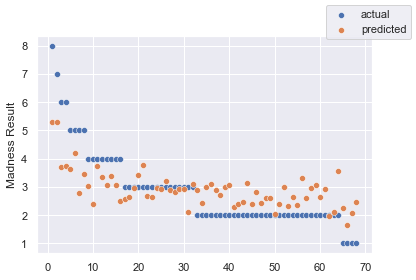

In [95]:
fig, ax = plt.subplots()
sns.scatterplot(data=result_df,x=list(range(1,69)), y='Madness Result', ax=ax)
sns.scatterplot(data=result_df,x=list(range(1,69)), y='Predicted Result', ax=ax)
fig.legend(['actual','predicted'])
#sns.kdeplot(df['col2'], ax=list(range(1,69)))